### Matplotlib 2

#### Matplotlib is a `plotting` library for the Python programming language and its numerical mathematics extension NumPy.

#### Please complete Pandas and Numpy Tutorials before attempting Matplotlib

#### Things covered: 
- Histogram
- Stacked Bar Chart
- Wordcloud

Datasets required:

1. loans-25k.csv
2. trumptweets-1515775693.tweets.csv (https://github.com/mkearney/trumptweets/blob/master/data/trumptweets-1515775693.tweets.csv)

Import necessary packages:

- import pandas as pd
- import numpy as np
- import matplotlib.pyplot as plt
- import seaborn as sns


- import re
- from wordcloud import WordCloud

Copy the configurations below.
```python
# Display all floats rounded off to 2 decimal place
pd.options.display.float_format = '{:,.2f}'.format
# Plot inline in Jupyter notebook
%matplotlib inline
# Settings throughout the notebook
sns.set()
# Width = 16, Height = 6
DIMS=(16, 6)
```

In [5]:
#!pip install wordcloud

##### Read from the `loans-25k.csv` into `loan_df`

## Histogram

A histogram is used to plot the **count** of individual observations within a bin. Each bin has **a specified range** as determined by the position and width of the bar.

Note: If you see the warning `The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.`, you can ignore it.

Plot a histogram using `loan_amnt` with `bins=20`. `bins` represent the number of `'buckets'` in the histogram to put the values in.

Funfact: quoted statuses are tweets that quote other tweets

To understand the left and right limits of each bin, use `pd.cut(Series, bins=bins)`. Store the output in a new column `loan_amnt_bin`. 

Afterwards, you can use `df.groupby()` and `size()` to get the number of observations in each bin.

## Multiple Subplots




##### Data processing

To see how many loans belonging to each grade divided by its different loan terms, we need to group the data by the 2 columns `grade` and `loan terms`. Afterwards, use `df.groupby()` and `size()` to perform this counting. Note that `df.groupby()` can take also take in a `list` as its parameter.

In [2]:
term_grade_loan_df = loan_df.copy()

term_grade_loan_df = term_grade_loan_df[['id', 'term', 'grade']]
term_grade_loan_df.head()

term_grade_loan_df_groupby = term_grade_loan_df.groupby(['term','grade'])
term_grade_loan_df = term_grade_loan_df_groupby.size().reset_index(name='number of loans')
term_grade_loan_df

In order to represent each term as one column to view the data in another manner, we can use `df.pivot_table()` for this step.

Set the columns as `grade`, `36 months` and `60 months`.

Then, to turn it into a more proper format that we are familiar with, with the index being integers starting from 0, we will need to reset the index.

In [3]:
term_grade_loan_pivot = pd.pivot_table(
    term_grade_loan_df,
    index='grade',
    columns=['term'],
    values=['number of loans'],
    aggfunc=sum
)

#Resetting the index and renaming the columns
term_grade_loan_pivot = term_grade_loan_pivot.reset_index()
term_grade_loan_pivot.columns = ['grade', '36 months', '60 months']
term_grade_loan_pivot

### Plotting multiple subplots

You can add multiple subplots side by side for data comparison. Use `fig.add_subplot` to do so. The first value is the number of rows and the second value is the number of columns.

The plots are numbered from 1 and increase as you move right, then move down. In this case, the first plot will be position `1` and the second plot is position `2`. Each of them will be assigned to an `AxePlot` with variables `ax1` and `ax2`.

Note that when you create individual plots, set the `ax` parameter to the `ax1` or `ax2` variable. Also, when plots are side-by-side, **the $y$-axis should reflect the same scale**.

##### Try adding in the plot for 60 months

In [6]:
fig = plt.figure(figsize=(16, 7))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,7))
# fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2,2,figsize=(16,7))

# Plot for 36 months
sns.barplot(x=term_grade_loan_pivot['grade'], y=term_grade_loan_pivot['36 months'], 
            ax=ax1, color="tomato")

ax1.set_ylabel("No. of Loans")
ax1.set_title("No. of Loans by Grade, 36 Months Term")
# Set the y axis limits to be on the same scale.
ax1.set_yticks(np.arange(0, 7500, 1000))

# Try plotting for 60 months


plt.show()

## Stacked bar plots

To plot the stacked graph, use `stacked=True` when you plot the graph from the `DataFrame`. Note that for this, the column that you would like to be the $x$-axis **needs** to be the index. 

Set the index by using `.set_index('grade')`.

Then, plot the stacked bar plot with `stacked=True` in a normal bar plot with `kind = 'bar'`

## Extra time: Word Cloud 

#### A wordcloud is useful to find ot what common words appear in a dataset with text. It can be used during presentations to illustrate points.

Read `trumptweets-1515775693.tweets.csv` into `trump_df`. 

If it doesn't work, include `encoding = 'utf-8' as this is a big dataset`

In [74]:
trump_df = pd.read_csv('trumptweets-1515775693.tweets.csv')
trump_df.head()

,status_id,created_at,user_id,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,...,retweet_verified,place_url,place_name,place_full_name,place_type,country,country_code,geo_coords,coords_coords,bbox_coords
0,x1864367186,2009-05-20 22:29:47,x25073877,realDonaldTrump,Read a great interview with Donald Trump that ...,Twitter Web Client,112,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,x9273573134835712,2010-11-29 15:52:46,x25073877,realDonaldTrump,Congratulations to Evan Lysacek for being nomi...,Twitter Web Client,127,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,x29014512646,2010-10-28 18:53:40,x25073877,realDonaldTrump,I was on The View this morning. We talked abou...,Twitter Web Client,139,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,x7483813542232064,2010-11-24 17:20:54,x25073877,realDonaldTrump,Tomorrow night's episode of The Apprentice del...,Twitter Web Client,140,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,x5775731054,2009-11-16 21:06:10,x25073877,realDonaldTrump,Donald Trump Partners with TV1 on New Reality ...,Twitter Web Client,116,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Store the 'text' column into a series

In [76]:
trump_tweets = trump_df['text']
trump_tweets.head()

0    Read a great interview with Donald Trump that ...
1    Congratulations to Evan Lysacek for being nomi...
2    I was on The View this morning. We talked abou...
3    Tomorrow night's episode of The Apprentice del...
4    Donald Trump Partners with TV1 on New Reality ...
Name: text, dtype: object

You may run this code to see a randomly picked sample of the texts.

In [77]:
trump_tweets.sample(1).iloc[0]

'"@JulieWind: @realDonaldTrump Mr. Trump I just love your show. I have seen every season!! Thanks it is great entertainment! Julie Wind" Love'

To build a wordcloud, all the `tweets` need to be strung to form a `long string`. But, some cleaning needs to be done first. The next steps are used to collect these words:

1. Convert to list
2. Remove HTML tags
3. Remove special characters from the descriptions. Remove trailing and leading spaces, convert all words to lower case

In [78]:
trump_tweets_list = trump_tweets.tolist()
trump_tweets_list[0:5]

['Read a great interview with Donald Trump that appeared in The New York Times Magazine: http://tinyurl.com/qsx4o6',
 "Congratulations to Evan Lysacek for being nominated SI sportsman of the year. He's a great guy, and he has my vote!  #EvanForSI",
 "I was on The View this morning. We talked about The Apprentice. Tonight's episode is a great one--tough, exciting and surprising. 10 pm/NBC",
 "Tomorrow night's episode of The Apprentice delivers excitement at QVC along with appearances by Isaac Mizrahi and Cathie Black. 10 pm on NBC",
 "Donald Trump Partners with TV1 on New Reality Series Entitled, Omarosa's Ultimate Merger: http://tinyurl.com/yk5m3lc"]

In [111]:
temp_list = []
for x in trump_tweets_list:
    # Remove the first bunch of letters
    x2 = re.sub('Borrower added on (\d/?)+\s>', '', x)
    # Remove HTML tags
    x2 = re.sub('<[a-z]+/?>', '', x2)   
    # Remove special characters
    x2 = re.sub('[-_,$&!.;:%/]', ' ', x2)
    
    # Remove his twitter name @realdonaldtrump since it appears on every single tweet and we don't want to analyse this
    x2 = re.sub(r'(?<![a-z])realdonaldtrump(?![a-z])', ' ', x2, flags=re.IGNORECASE)
    
    # Also, remove http and https since he likes to give links to websites.
    x2 = re.sub(r'(?<![a-z])https(?![a-z])', ' ', x2, flags=re.IGNORECASE)
    x2 = re.sub(r'(?<![a-z])http(?![a-z])', ' ', x2, flags=re.IGNORECASE)
    
    # Convert to lower case, remove leading and trailing spaces
    x2 = x2.strip().lower()   
    temp_list.append(x2)
    
temp_list[0:5]

['read a great interview with donald trump that appeared in the new york times magazine      tinyurl com qsx4o6',
 "congratulations to evan lysacek for being nominated si sportsman of the year  he's a great guy  and he has my vote   #evanforsi",
 "i was on the view this morning  we talked about the apprentice  tonight's episode is a great one  tough  exciting and surprising  10 pm nbc",
 "tomorrow night's episode of the apprentice delivers excitement at qvc along with appearances by isaac mizrahi and cathie black  10 pm on nbc",
 "donald trump partners with tv1 on new reality series entitled  omarosa's ultimate merger      tinyurl com yk5m3lc"]

<Figure size 1080x576 with 0 Axes>

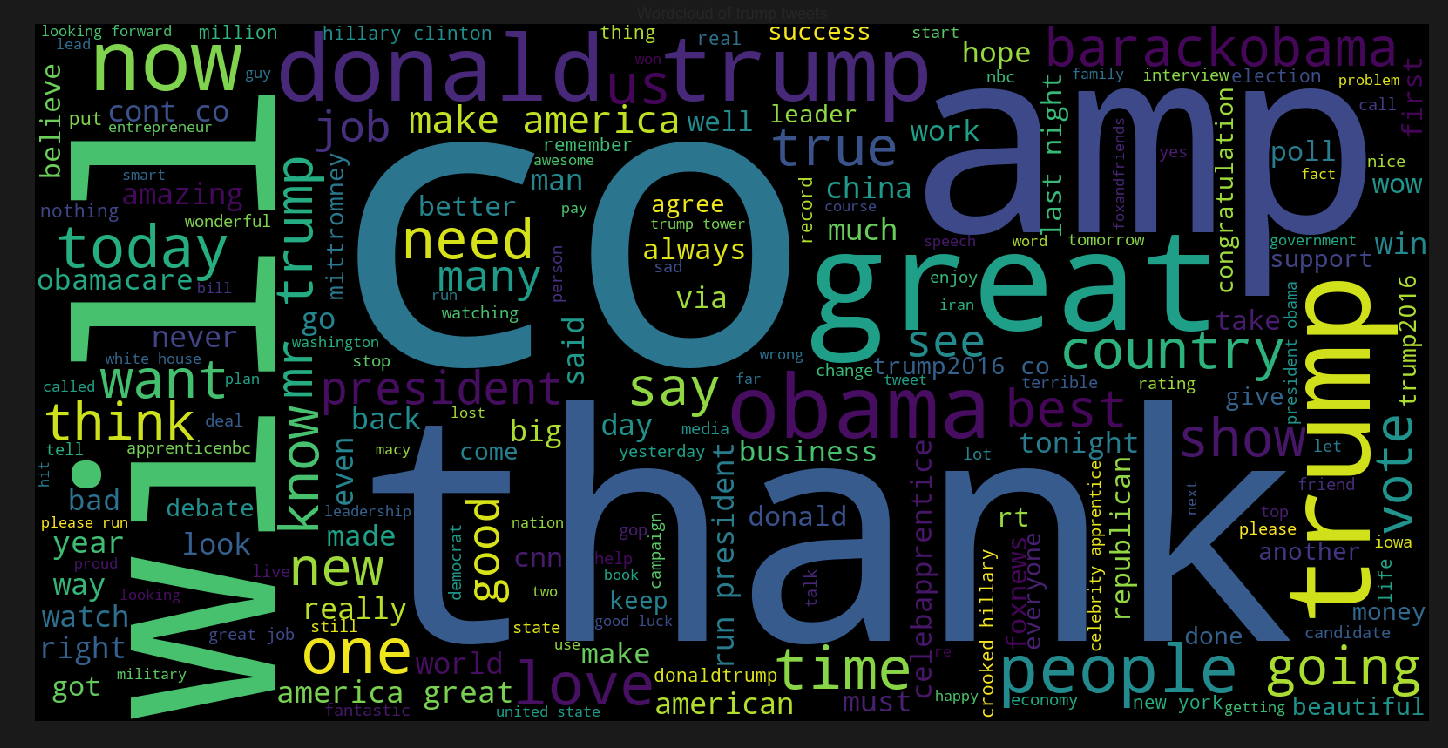

In [112]:
long_str = " ".join(temp_list)

plt.figure(figsize=(15,8))
# Plot the wordcloud
desc_wordcloud = WordCloud(
    width=1600, height=800).generate(long_str)

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(desc_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("Wordcloud of trump tweets", fontsize=16)
plt.show()
